### Autolib Electric Car Sharing Company

Working as a data scientist for AutoLib Electric car sharing services, you have been tasked to investigate the claim that clients who take bluecars on the weekday will return them during the end of weekday(Friday). other clients prefer to rent on the weekend

In [71]:
#importing our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

AutoLib_df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
AutoLib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [2]:
AutoLib_df.columns = map(str.lower,AutoLib_df.columns)
AutoLib_df=AutoLib_df.rename(columns= {'postal code':'postal_code','dayofweek':'day_of_week'})
AutoLib_df

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [3]:
AutoLibGloss = pd.read_excel("/content/columns_explanation.xlsx")
AutoLibGloss

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [4]:
AutoLib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   day_of_week             16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
AutoLib_df

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


Completeness of data

In [6]:
AutoLib_df.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [7]:
AutoLib_df.shape

(16085, 13)

In [8]:
AutoLib_df.describe()

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [9]:
AutoLib_df.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [11]:
AutoLib_df=AutoLib_df.drop(['n_daily_data_points'],axis=1)
AutoLib_df=AutoLib_df.drop(['slots_freed_sum'],axis=1)
AutoLib_df=AutoLib_df.drop(['slots_taken_sum'],axis=1)
AutoLib_df=AutoLib_df.drop(['utilib_taken_sum'],axis=1)
AutoLib_df=AutoLib_df.drop(['utilib_returned_sum'],axis=1)
AutoLib_df=AutoLib_df.drop(['utilib_14_taken_sum'],axis=1)
AutoLib_df=AutoLib_df.drop(['utilib_14_returned_sum'],axis=1)

In [12]:
AutoLib_df

,postal_code,date,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117
...,...,...,...,...,...,...
16080,95880,6/15/2018,4,weekday,15,10
16081,95880,6/16/2018,5,weekend,19,19
16082,95880,6/17/2018,6,weekend,33,35
16083,95880,6/18/2018,0,weekday,11,14


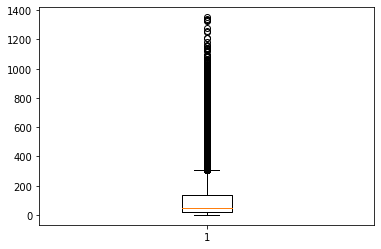

In [18]:
plt.boxplot(AutoLib_df['bluecars_taken_sum'])
plt.show()

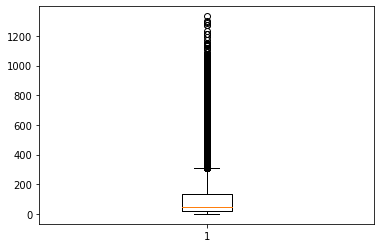

In [19]:
plt.boxplot(AutoLib_df['bluecars_returned_sum'])
plt.show()

In [20]:
#Taking care of outliers
AutoLib_df['bluecars_taken_sum'] = np.where(AutoLib_df['bluecars_taken_sum'] > 135,135,AutoLib_df['bluecars_taken_sum'])
AutoLib_df['bluecars_returned_sum'] = np.where(AutoLib_df['bluecars_returned_sum'] > 135,135,AutoLib_df['bluecars_returned_sum'])
AutoLib_df.describe()

,postal_code,day_of_week,bluecars_taken_sum,bluecars_returned_sum
count,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,2.969599,63.811501,63.845819
std,7647.342000,2.008378,49.603989,49.526969
min,75001.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,20.000000,20.000000
50%,92340.000000,3.000000,46.000000,46.000000
75%,93400.000000,5.000000,135.000000,135.000000
max,95880.000000,6.000000,135.000000,135.000000


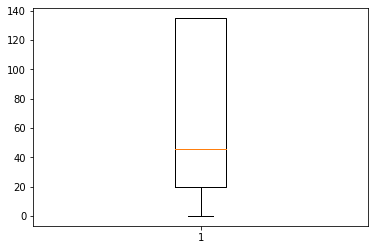

In [21]:
plt.boxplot(AutoLib_df['bluecars_taken_sum'])
plt.show()

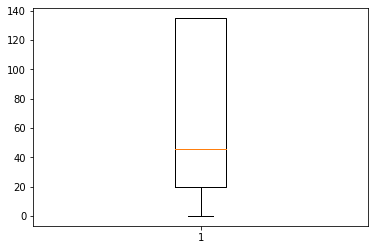

In [22]:
plt.boxplot(AutoLib_df['bluecars_returned_sum'])
plt.show()

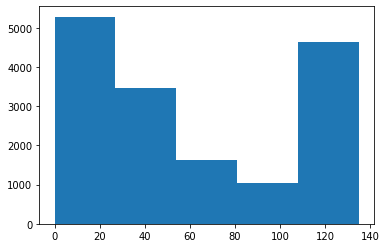

In [23]:
plt.hist(AutoLib_df['bluecars_returned_sum'],bins=5)
plt.show()

### Univariate Analysis

In [30]:
AutoLib_df.loc[(AutoLib_df.day_of_week == 0)|(AutoLib_df.day_of_week == 1)|(AutoLib_df.day_of_week == 2)|(AutoLib_df.day_of_week == 3)|(AutoLib_df.day_of_week == 4)]

,postal_code,date,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,135,135
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117
...,...,...,...,...,...,...
16078,95880,6/13/2018,2,weekday,12,13
16079,95880,6/14/2018,3,weekday,15,13
16080,95880,6/15/2018,4,weekday,15,10
16083,95880,6/18/2018,0,weekday,11,14


In [25]:
#create a dataframe for interested area
postal_df = AutoLib_df.loc[(AutoLib_df.postal_code == 75015) | (AutoLib_df.postal_code == 75017)]
postal_df

,postal_code,date,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
2184,75015,1/1/2018,0,weekday,135,135
2185,75015,1/2/2018,1,weekday,135,135
2186,75015,1/3/2018,2,weekday,135,135
2187,75015,1/4/2018,3,weekday,135,135
2188,75015,1/5/2018,4,weekday,135,135
...,...,...,...,...,...,...
2647,75017,6/15/2018,4,weekday,135,135
2648,75017,6/16/2018,5,weekend,135,135
2649,75017,6/17/2018,6,weekend,135,135
2650,75017,6/18/2018,0,weekday,135,135


In [31]:
weekend_postal_df = postal_df.loc[(postal_df.day_of_week == 5) | (postal_df.day_of_week == 6)]
weekend_postal_df

,postal_code,date,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
2189,75015,1/6/2018,5,weekend,135,135
2190,75015,1/7/2018,6,weekend,135,135
2196,75015,1/13/2018,5,weekend,135,135
2197,75015,1/14/2018,6,weekend,135,135
2203,75015,1/20/2018,5,weekend,135,135
...,...,...,...,...,...,...
2635,75017,6/3/2018,6,weekend,135,135
2641,75017,6/9/2018,5,weekend,135,135
2642,75017,6/10/2018,6,weekend,135,135
2648,75017,6/16/2018,5,weekend,135,135


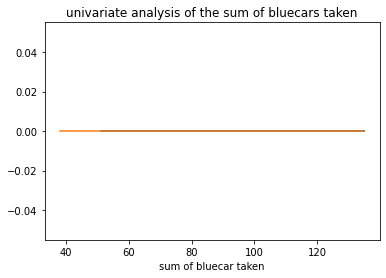

In [27]:
plt.plot(weekend_postal_df.bluecars_taken_sum,np.zeros_like(weekend_postal_df.bluecars_taken_sum))
plt.title("univariate analysis of the sum of bluecars taken")
weekday_postal_df = postal_df.loc[(postal_df.day_of_week == 0) | (postal_df.day_of_week == 1) | (postal_df.day_of_week == 2) | (postal_df.day_of_week == 3)| (postal_df.day_of_week == 4)]
plt.plot(weekday_postal_df.bluecars_taken_sum,np.zeros_like(weekday_postal_df.bluecars_taken_sum))
plt.xlabel("sum of bluecar taken")
plt.show()

### Measure of central tendancy

Mean

In [33]:
#mean of sum of blue cars taken
AutoLib_df.bluecars_taken_sum.mean()

63.81150139881878

In [34]:
#mean of sum of blue cars returned
AutoLib_df.bluecars_returned_sum.mean()

63.84581908610507

Standard deviation

In [38]:
AutoLib_df.bluecars_taken_sum.std()

49.60398912281523

In [39]:
AutoLib_df.bluecars_returned_sum.std()

49.52696885111611

Variance

In [36]:
AutoLib_df.bluecars_taken_sum.var()

2460.5557368963714

In [37]:
AutoLib_df.bluecars_returned_sum.var()

2452.9206435794254

## Bivariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


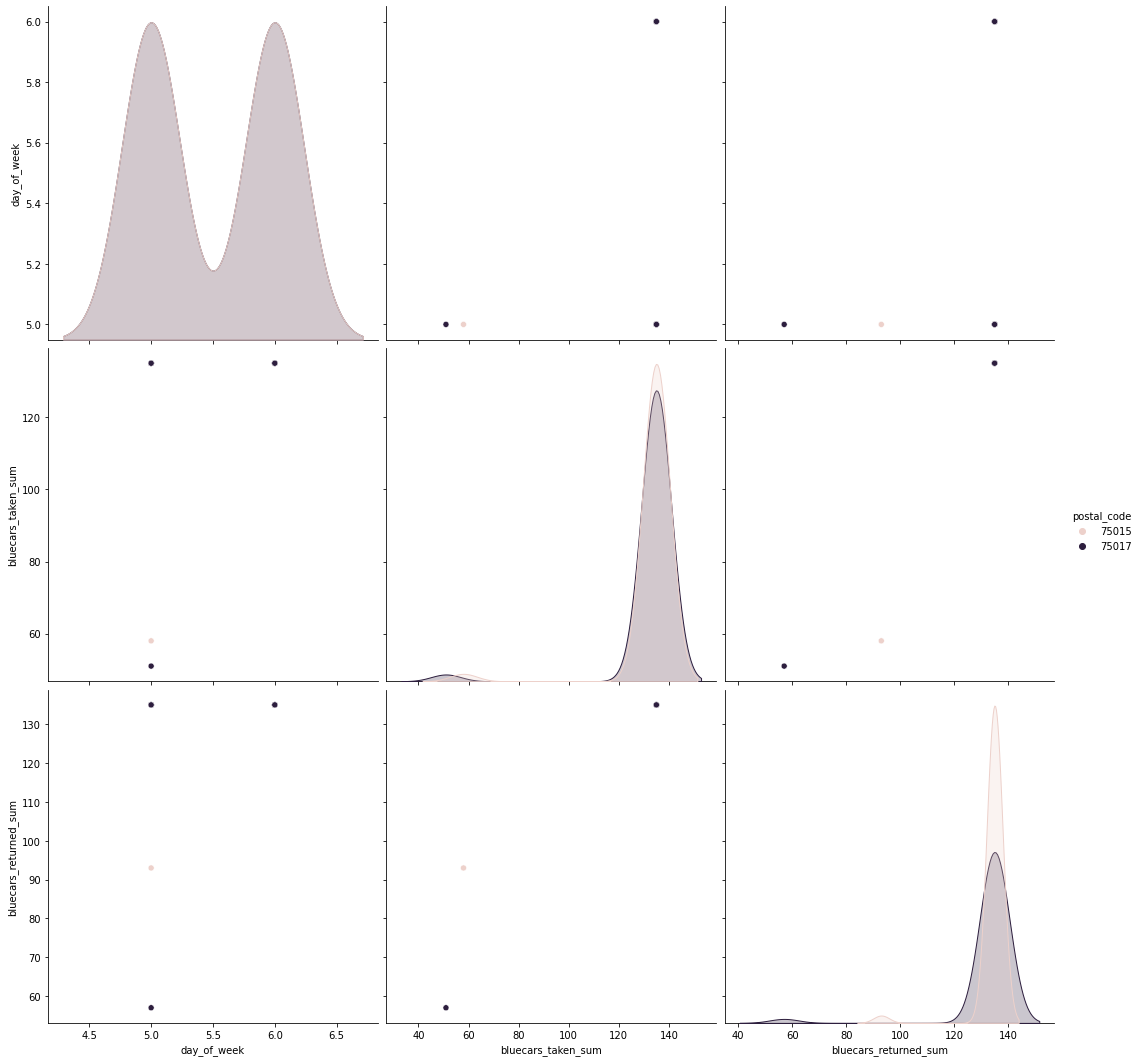

In [28]:
sns.pairplot(weekend_postal_df,hue='postal_code',size = 5)

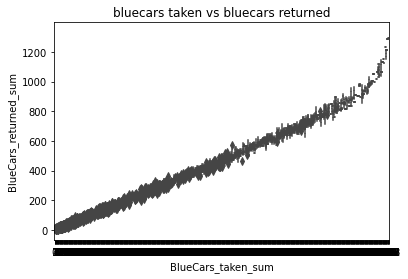

In [77]:
sns.boxplot(x=AutoLib_df['BlueCars_taken_sum'],y=AutoLib_df['BlueCars_returned_sum'])
plt.title("bluecars taken vs bluecars returned")
plt.show()

# HYPOTHESIS TESTING

**Problem Statement**




1.   Clients who take bluecar on the weekday return them during the weekday(i.e monday to friday)



Step 1: Formulate the null hypothesis and alternative hypothesis:

Ho: µ(Bluecars taken during the weekday) = µ(Bluecar returned during the weekday)

Ha: µ(Bluecars taken during the weekday) ≠ µ(Bluecar returned during the weekday) 

Step 2: Identify a test statistic and significance level to be used in assesment



*   Significance Level = 5%
*   2 z - sample test(This is because we are drawing inference from mean of two samples)



Step 3: Finding the p-value and test-statistics

In [32]:
 Weekday_df=AutoLib_df.loc[(AutoLib_df.day_of_week == 0)|(AutoLib_df.day_of_week == 1)|(AutoLib_df.day_of_week == 2)|(AutoLib_df.day_of_week == 3)|(AutoLib_df.day_of_week == 4)]
 Weekday_df

,postal_code,date,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,135,135
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117
...,...,...,...,...,...,...
16078,95880,6/13/2018,2,weekday,12,13
16079,95880,6/14/2018,3,weekday,15,13
16080,95880,6/15/2018,4,weekday,15,10
16083,95880,6/18/2018,0,weekday,11,14


In [42]:
#Finding our first mean
x1 = Weekday_df.bluecars_taken_sum.mean()
x1

61.24055786555787

In [44]:
#second mean
x2 = Weekday_df.bluecars_returned_sum.mean()
x2

61.43381843381843

In [45]:
#standard deviation of our sample
std1 = Weekday_df.bluecars_taken_sum.std()
std1

49.584111981895774

In [46]:
std2 = Weekday_df.bluecars_returned_sum.std()
std2

49.395350695190835

In [47]:
#Finding the size of of the first sample
num1 = Weekday_df.bluecars_taken_sum.count()
num1

11544

step 4: Analyzing data

Find P-value and t-statistic

In [70]:
from scipy.stats import *

_s,p_value = stats.ttest_ind(a=Weekday_df.bluecars_taken_sum,b=Weekday_df.bluecars_returned_sum,equal_var=True)

In [62]:
print(p_value)

0.7667123192859796


In [66]:
#test statistic
_s

-0.2966815419171609

In [64]:
if p_value < 0.05: #alpha value is 5% which is 0.05: alpha = 0.05
  print("We are rejecting null hypothesis")
else:
  print("We are accepting the null hypothesis")

We are accepting the null hypothesis


step 5: interpreting the data

The null hypothesis is accepted, this means the sum of the number of blue cars taken during the weekday is equal to the sum of the number of blue cars returned

Calculating a 95% confidence level

In [72]:
#confidence interval
sigma = Weekday_df.bluecars_taken_sum.std()/ math.sqrt(11544)

stats.t.interval(0.95,df=11543,loc = Weekday_df.bluecars_taken_sum.mean(),scale=sigma)

(60.335954888186265, 62.14516084292947)